<a href="https://colab.research.google.com/github/matsl92/machine_learning/blob/main/classifiers/smoke_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import sys


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# **1. Download and save the database**

In [ ]:
drive.mount("/content/drive")
sys.path.append("/content/drive/MyDrive/Colab Notebooks/Laboratory_2")
%cd "/content/drive/MyDrive/Colab Notebooks/Laboratory_2"
df = pd.DataFrame(pd.read_csv("smoke_detection_iot.csv"))

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Laboratory_2


In [ ]:
df = df.drop(df.columns[0], axis=1) # This piece of code gets rid of the first column which contains the index of all the instances

In [ ]:
target = pd.DataFrame(df["Fire Alarm"])

In [ ]:

data = pd.DataFrame(df.drop(["Fire Alarm"], axis = 1))

In [ ]:
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [ ]:
df.info() # By using the info and isnull methods one can tell whether the dataset is clean or not. In this case the dataset is clean.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


## 1b) Normalize the database
This process takes every column of the data frame and scales each datum to the value it would have if the maximum and minimum values of the column were one and zero. The porpuse of this is to give all features the same range so that none of them will be more relevant just by the nature of its value range when fitting a model.
Database normalization can be done easily with MinMaxScaler's method fit_transform.

In [ ]:
norm_x = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns) # norm_x is a new pandas dataframe with the escalated data

# **2. Random forest classifier**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(norm_x.values, target.values, test_size=0.3, random_state=10)

## 2a) Best number of trees for random forest algorithm

In [ ]:
# This cell might take a while to execute
ind_scores = []
for i in range(1, 200, 10):
  rfc_model = RandomForestClassifier(n_estimators=i, criterion="gini", min_samples_split=10, random_state=1)
  rfc_model.fit(X_train, Y_train.ravel())
  prediction = rfc_model.predict(X_test)
  ind_score = (i, accuracy_score(Y_test, prediction))
  ind_scores.append(ind_score)
ind_scores.sort(key = lambda x: x[1], reverse = True)
best_n = ind_scores[0][0]
print(f'The best number of trees was {ind_scores[0][0]} with a score of {ind_scores[0][1]}')

The best number of trees was 21 with a score of 0.9999467773697376


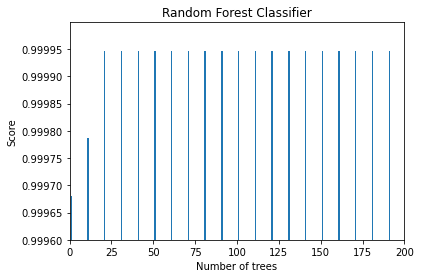

In [ ]:
plt.bar([i[0] for i in ind_scores], [i[1] for i in ind_scores]) # The arguments are two lists written in list notation. 
plt.xlabel("Number of trees")
plt.ylabel("Score")
plt.axis([0, 200, 0.9996, 0.999999]) # The axis method allows to apply a zoom in the area of interest.
plt.title("Random Forest Classifier")
plt.show()

## 2b) Best depth for random forest classifier

In [ ]:
# This cell might take a while to execute
depth_scores = []
for i in range(1, 20):
  rfc_model = RandomForestClassifier(n_estimators=best_n, max_depth=i, criterion="gini", min_samples_split=10, random_state=1)
  rfc_model.fit(X_train, Y_train.ravel())
  prediction = rfc_model.predict(X_test)
  depth_score = (i, accuracy_score(Y_test, prediction))
  depth_scores.append(depth_score)
depth_scores.sort(key = lambda x: x[1], reverse = True)
best_depth = depth_scores[0][0]
print(f'The best depth was {depth_scores[0][0]} with a score of {depth_scores[0][1]}')

The best depth was 9 with a score of 0.9999467773697376


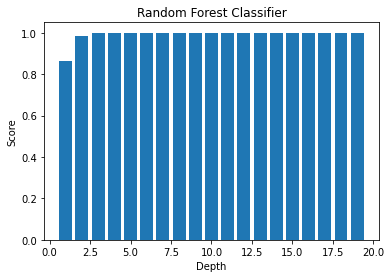

In [ ]:
plt.bar([depth_score[0] for depth_score in depth_scores], [depth_score[1] for depth_score in depth_scores]) # The arguments are two lists written in list notation.
plt.xlabel("Depth")
plt.ylabel("Score")
plt.title("Random Forest Classifier")
plt.show()

# **3. KNN classifier**

## 3a) Trying different k values and other parameters

In [ ]:
# This cell might take a while to execute
ks_and_scores = []
for k in range(2, 30, 1):
  knn_model = KNeighborsClassifier(n_neighbors=k, p=2, weights="uniform")
  knn_model.fit(X_train, Y_train.ravel())
  prediction = knn_model.predict(X_test)
  k_and_score = (k, accuracy_score(Y_test, prediction))
  ks_and_scores.append(k_and_score)
ks_and_scores.sort(key = lambda x: x[1], reverse = True)
best_k = ks_and_scores[0][0]

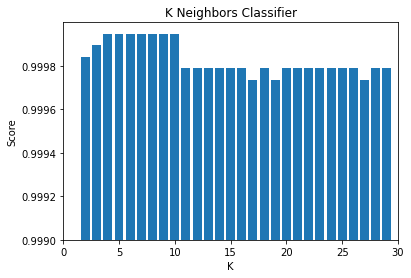

In [ ]:
plt.bar([i[0] for i in ks_and_scores], [i[1] for i in ks_and_scores]) # The arguments are two lists written in list notation.
plt.xlabel("K")
plt.ylabel("Score")
plt.axis([0, 30, 0.999, 0.999999])
plt.title("K Neighbors Classifier")
plt.show()

## 3b) Score for best k value

In [ ]:
print(f'The best k was {ks_and_scores[0][0]} with a score of {ks_and_scores[0][1]}')

The best k was 4 with a score of 0.9999467773697376


# **4. SVM classifier**

## 4a) Trying several kernels for a SVM classifier

In [ ]:
# This cell might take a while to execute
kernels = ["linear", "poly", "rbf", "sigmoid"]
kerns_scores = []
for kernel in kernels:
  svm_model = SVC(kernel=kernel, gamma="scale")
  svm_model.fit(X_train, Y_train.ravel())
  prediction = svm_model.predict(X_test)
  kern_score = (kernel, accuracy_score(Y_test, prediction))
  kerns_scores.append(kern_score)
kerns_scores.sort(key = lambda x: x[1], reverse = True)
best_kernel = kerns_scores[0][0]
print(f"The best kernel was {kerns_scores[0][0]} with a score of {kerns_scores[0][1]}")

The best kernel was rbf with a score of 0.999733886848688


In [ ]:
a = ([k[0] for k in kerns_scores], ["scale", "scale", "scale", "scale"], [k[1] for k in kerns_scores])
table = pd.DataFrame(a, index=["kernel", "gamma", "score"])
table.head()

,0,1,2,3
kernel,rbf,poly,linear,sigmoid
gamma,scale,scale,scale,scale
score,0.999734,0.999681,0.978285,0.754218


## 4b) Changing Epsilon and Alpha values by little steps

Since there is not epsilon and alpha parameters for SVM Classifier, only for SVM Regressor. the exercise will be done with the parameters C and max_iter.

Trying different C values

In [ ]:
# This cell might take a while to execute
Cs_scores = []
for i in np.arange(0.1, 4, 0.2):
  svm_model = SVC(kernel=best_kernel, gamma="scale", C=i)
  svm_model.fit(X_train, Y_train.ravel())
  prediction = svm_model.predict(X_test)
  C_score = (i, accuracy_score(Y_test, prediction))
  Cs_scores.append(C_score)
Cs_scores.sort(key = lambda x: x[1], reverse = True)
best_C = Cs_scores[0][0]
print(f"The best C was {Cs_scores[0][0]} with a score of {Cs_scores[0][1]}")

The best C was 0.9000000000000001 with a score of 0.999733886848688


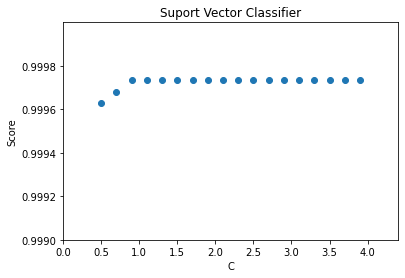

In [ ]:
plt.scatter([i[0] for i in Cs_scores], [i[1] for i in Cs_scores]) # The arguments are two lists written in list notation.
plt.xlabel("C")
plt.ylabel("Score")
plt.axis([0, 4.4, 0.999, 0.999999]) # This method allows to apply a zoom in the area of interest.
plt.title("Suport Vector Classifier")
plt.show()

Trying different max_iter values

In [ ]:
# This cell might take a while to execute
iters_scores = []
for i in range(1200, 3200, 500):
  svm_model = SVC(kernel=best_kernel, gamma="scale", C=best_C, max_iter=i)
  svm_model.fit(X_train, Y_train.ravel())
  prediction = svm_model.predict(X_test)
  iter_score = (i, accuracy_score(Y_test, prediction))
  iters_scores.append(iter_score)
iters_scores.sort(key = lambda x: x[1], reverse = True)
best_max_iter = iters_scores[0][0]
print(f"The best max_iter was {iters_scores[0][0]} with a score of {iters_scores[0][1]}")

The best max_iter was 1200 with a score of 0.999733886848688


At this point the parameter max_iter does not make any difference in the result of the SVM model.

In [ ]:
print(iters_scores)

[(1200, 0.999733886848688), (1700, 0.999733886848688), (2200, 0.999733886848688), (2700, 0.999733886848688)]
